# <center> Escuela de ML y DL Módulo 1 </center> 
##  <center> Tarea 2. Regresión logística </center>
##  <center> Arnoldo Fernando Chue Sánchez </center>
##  <center> arnoldwork20@gmail.com </center>
##  <center> Marzo de 2024 </center>

## Contenido 
1. Planteamiento del problema
2. Planteamiento de la solución
    * Preparar los datos
    * Análisis Exploratorio de Datos (EDA)
    * Preprocesamiento de los datos
        * Manejo de datos nulos
        * Manejo de datos categóricos
    * Dividir los datos en la matriz X y el vector de etiquetas Y
        * Estandarización y normalización
    * Creación del modelo 
3. Ejemplo de ejecución con la solución
    * Realizar predicciones
    * Analizar los resultados con diferentes métricas
4. Conclusiones 
5. Referencias

# 1. Planteamiento del problema

*Usando el conjunto de datos siguiente: https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma y la libreta de JupyterLab P2-Regresion-lineal construyan un modelo de regresión logística binario. El objetivo es encontrar patrones entre las solicitudes realizadas a Uber y Lyft. También deben hacer un análisis de los resultados usando como métricas: la exactitud (accuracy), la sensibilidad (recall) y la métrica F1 (Score F1). Recuerden hacer el análisis de los datos y anotar sus conclusiones.*

# 2. Planteamiento de la solución

Sabemos por las instrucciones que vamos a construir un clasificador binario con regresión logística para las clases de Uber y Lift

En primer lugar vamos a importar todos los módulos y funciones que vamos a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

Fijamos el directorio del dataset que descargamos de Kaggle para la actividad

In [2]:
PATH = "./datasets/"

## Preparar los datos

In [3]:
df1 = pd.read_csv(PATH + "rideshare_kaggle.csv")

Por el tiempo que tardó en cargar el dataset sabemos que tenemos un gran conjunto de datos.

## Análisis exploratorio de datos

In [4]:
df1.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Aquí por lo menos ya logramos ubicar la columna que tiene nuestras clases: "cab_type".

In [6]:
df1["cab_type"].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [7]:
print("Porcentajes de cada clase:")
print(f"{round(df1[df1["cab_type"] == "Uber"].shape[0] * 100 / df1.shape[0], 2)}%")
print(f"{round(df1[df1["cab_type"] == "Lyft"].shape[0] * 100 / df1.shape[0], 2)}%")

Porcentajes de cada clase:
55.65%
44.35%


Parece que tenemos bien balanceadas las clases del modelo. Su diferencia no debería ser tan significativa

Veamos el resto de los datos

In [8]:
df1.shape

(693071, 57)

693,071 instancias y 57 atributos.

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Aquí podemos hacer varias observaciones
- Sólo tenemos datos nulos en el precio del viaje. Compararemos si será mejor rellenar los datos faltantes con la media o con la mediana.
- La primer columna id es un identificador que podemos eliminar porque ya tenemos el índice del dataframe en pandas
- Las columnas de información numérica de clima no tendremos que modificarlas por ahora. Solamente hasta que estandarizemos/normalizemos
- Las columnas de información de texto del clima hay que cambiarlas de tipo objeto a tipo string
- Las columnas de los lugares de salida y destino también hay que convertirlas en tipo string
- Las columnas relacionadas al servicio (Uber o Lift) que no son la de las etiquetas son controversiales sobre el tema de eliminarlas o no. Por un lado, yo las eliminaría porque no le encuentro caso hacer un modelo en cuyos datos de entrenamiento ya vengan las etiquetas (aunque sea en otro formato). Sin embargo, puede que al eliminarlas del dataframe generen una pérdida de información muy grande en el modelo y nos bajen las métricas. Por lo tanto, voy a hacer un conjunto sin ellas y en otro lo voy a dejar.
- Sobre las columnas de información relacionada al tiempo, hora y fecha del servicio (que no están relacionadas con el clima). Hay que ver con cuáles nos quedamos porque no sólo generan redundancia. También algunas pueden afectar nuestro modelo.

Comenzamos con la limpieza

Eliminamos la columna del id

In [4]:
df1.drop("id", axis=1, inplace=True)

Cambiamos las columnas de información de texto del clima para tratarlas como string: icon, short_summary y long_summary.

In [5]:
df1["icon"] = df1["icon"].astype("string")
df1["short_summary"] = df1["short_summary"].astype("string")
df1["long_summary"] = df1["long_summary"].astype("string")

Hacemos lo mismo para las columnas de los lugares de salida y llegada: source y destination

In [6]:
df1["source"] = df1["source"].astype("string")
df1["destination"] = df1["destination"].astype("string")

Verificamos lo que llevamos hecho.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  object 
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  string 
 7   destination                  693071 non-null  string 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

Sobre las fechas...

En primer lugar podemos comprobar si lo que nos indican en Kaggle es cierto sobre la columna timezone: tiene un único valor. Si esto es cierto entonces podemos eliminar la columna porque no aporta información útil.

In [8]:
df1["timezone"].value_counts()

timezone
America/New_York    693071
Name: count, dtype: int64

Confirmamos que es un único valor así que vamos a eliminarlo.

In [7]:
df1.drop("timezone", axis=1, inplace=True)

Para la columna datetime. Para empezar el año es el mismo para todos los registros: 2018. Por lo que el año no vale la pena guardarlo. El mes, día y hora ya los tenemos, por lo que tampoco vale la pena guardarlos. Sin embargo, no tenemos los minutos ni segundos. Por lo tanto, vamos a crear dos columnas nuevas para sustituir la de datetime: minutes y seconds.

In [8]:
df1["minutes"] = df1["datetime"].apply(lambda x: x[-5:-3])
df1["seconds"] = df1["datetime"].apply(lambda x: x[-2:])
df1[["datetime", "minutes", "seconds"]].head()

,datetime,minutes,seconds
0,2018-12-16 09:30:07,30,07
1,2018-11-27 02:00:23,00,23
2,2018-11-28 01:00:22,00,22
3,2018-11-30 04:53:02,53,02
4,2018-11-29 03:49:20,49,20


In [9]:
df1["minutes"] = df1["minutes"].astype("int")
df1["seconds"] = df1["seconds"].astype("int")

Ahora sí podemos eliminar la columna datetime.

In [10]:
df1.drop("datetime", axis=1, inplace=True)

Por último modificamos el tipo de dato a strings para las columnas relacionadas con la etiqueta: cab_type, product_id y name

In [11]:
df1["cab_type"] = df1["cab_type"].astype("string")
df1["product_id"] = df1["product_id"].astype("string")
df1["name"] = df1["name"].astype("string")

Verificamos los cambios

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   source                       693071 non-null  string 
 5   destination                  693071 non-null  string 
 6   cab_type                     693071 non-null  string 
 7   product_id                   693071 non-null  string 
 8   name                         693071 non-null  string 
 9   price                        637976 non-null  float64
 10  distance                     693071 non-null  float64
 11  surge_multiplier             693071 non-null  float64
 12  latitude                     693071 non-null  float64
 13 

Hasta aquí podemos utilizar este conjunto como un dataset más robusto. Sin embargo, adicionalmente quiero hacer un segundo conjunto algo más reducido: sin las clases product_id y name para no relacionarlas directamente con la etiqueta. Y sin las fechas que están en formato de timestamp, es decir, sin la columna timestamp y sin las columnas de variables climáticas que involucran fechas. Esto porque ya tenemos las columnas que nos indican la fecha y hora del viaje. Por lo que quiero ver el desempeño del modelo con y sin esa información repetitiva sobre fechas.

Guardamos entonces el dataset más robusto

In [12]:
dfRobusto = df1.iloc[:,:]

Generamos el dataset eliminando todas las columnas descritas.

In [13]:
eliminadas = ["timestamp", "product_id", "name", "windGustTime", "temperatureHighTime", "temperatureLowTime", "apparentTemperatureHighTime", "apparentTemperatureLowTime", "sunriseTime", "sunsetTime", "uvIndexTime", "temperatureMinTime", "temperatureMaxTime", "apparentTemperatureMinTime", "apparentTemperatureMaxTime"]

In [14]:
dfLigero = df1.drop(eliminadas, axis=1)

In [22]:
dfLigero.head()

,hour,day,month,source,destination,cab_type,price,distance,surge_multiplier,latitude,...,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,minutes,seconds
0,9,16,12,Haymarket Square,North Station,Lyft,5.0,0.44,1.0,42.2148,...,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,30,7
1,2,27,11,Haymarket Square,North Station,Lyft,11.0,0.44,1.0,42.2148,...,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,0,23
2,1,28,11,Haymarket Square,North Station,Lyft,7.0,0.44,1.0,42.2148,...,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,0,22
3,4,30,11,Haymarket Square,North Station,Lyft,26.0,0.44,1.0,42.2148,...,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,53,2
4,3,29,11,Haymarket Square,North Station,Lyft,9.0,0.44,1.0,42.2148,...,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,49,20


Con nuestros dos dataframes podemos seguir a la siguiente fase

## Preprocesamiento de datos

### Manejo de datos nulos

Comenzamos comparando la media con la mediana.

In [15]:
media, mediana = dfLigero["price"].mean(), dfLigero["price"].median()
print(f"Media: {media}\nMediana: {mediana}")

Media: 16.545125490614065
Mediana: 13.5


In [16]:
dfLigero["price"].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

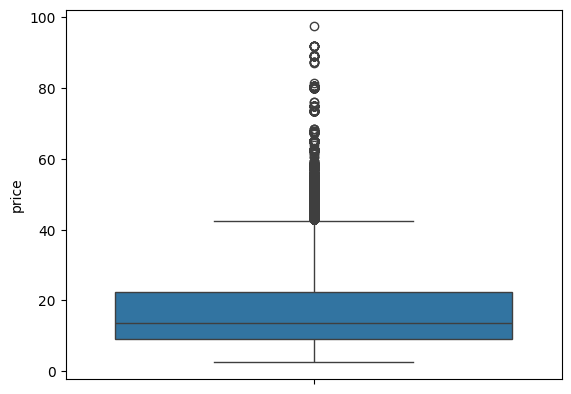

In [18]:
sns.boxplot(data=dfLigero["price"])
plt.show()

Con esto podemos ver que tenemos tarifas de viajes muy altas, pero son casos fuera de lo común. Por esa razón la media es mayor que la mediana. Ahora bien, para rellenar los datos nulos lo haremos con la mediana para mantener la distribución de los datos y por el tema de evitar los posibles sesgos que la media pueda tener.

In [16]:
dfRobusto["price"] = dfRobusto["price"].fillna(mediana)
dfLigero["price"] = dfLigero["price"].fillna(mediana)

In [20]:
dfRobusto["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 693071 entries, 0 to 693070
Series name: price
Non-Null Count   Dtype  
--------------   -----  
693071 non-null  float64
dtypes: float64(1)
memory usage: 5.3 MB


In [21]:
dfLigero["price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 693071 entries, 0 to 693070
Series name: price
Non-Null Count   Dtype  
--------------   -----  
693071 non-null  float64
dtypes: float64(1)
memory usage: 5.3 MB


### Manejo de datos categóricos

Busquemos en ambos dataframes las columnas que son categóricas.

In [15]:
dfLigero.select_dtypes(include=["string"]).columns

Index(['source', 'destination', 'cab_type', 'short_summary', 'long_summary',
       'icon'],
      dtype='object')

In [16]:
dfRobusto.select_dtypes(include=["string"]).columns

Index(['source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

Para evitar el tema de asignar un orden a nuestros datos al mapear las variables categóricas. Vamos a usar el LabelEnconder únicamente para la columna "cab_type". De hecho, esta columna es nuestra clase

In [17]:
le = LabelEncoder()
dfLigero["cab_type"] = le.fit_transform(dfLigero["cab_type"])
dfRobusto["cab_type"] = le.fit_transform(dfRobusto["cab_type"])

In [ ]:
dfRobusto["cab_type"].head()

0    0
1    0
2    0
3    0
4    0
Name: cab_type, dtype: int32

In [ ]:
dfLigero["cab_type"].value_counts()

cab_type
1    385663
0    307408
Name: count, dtype: int64

Por lo tanto, 1 es la etiqueta de Uber y 0 Lyft

Pasemos con las columnas a las que vamos a aplicar el OneHotEncoder

In [19]:
columnasLigeras = ['source', 'destination', 'short_summary', 'long_summary', 'icon']
columnasRobustas = ['source', 'destination', 'product_id', 'name', 'short_summary', 'long_summary', 'icon']

In [20]:
ohe = OneHotEncoder() # Iniciamos el transformador

# Lo aplicamos y nos regresa una matriz dispersa
matrizDispersaLigera = ohe.fit_transform(dfLigero[columnasLigeras])
matrizDispersaRobusta = ohe.fit_transform(dfRobusto[columnasRobustas])

# Volvemos a crear el dataframe ya codificado
dfLigeroCodificado = pd.DataFrame.sparse.from_spmatrix(matrizDispersaLigera)
dfRobustoCodificado = pd.DataFrame.sparse.from_spmatrix(matrizDispersaRobusta)

# Creamos el dataframe final con el original y la codificación del onehotenconder
dfLigeroFinal = pd.concat([dfLigero, dfLigeroCodificado], axis=1)
dfLigeroFinal = dfLigeroFinal.drop(columnasLigeras, axis=1)
dfRobustoFinal = pd.concat([dfRobusto, dfRobustoCodificado], axis=1)
dfRobustoFinal = dfRobustoFinal.drop(columnasRobustas, axis=1)

# Como no asigmanos nombres a las columnas creadas con el onehotenconder, sklearn les asigna un numero. Sin embargo para evitar errores transformamos todo a strings
dfLigeroFinal.columns = dfLigeroFinal.columns.astype("string")
dfRobustoFinal.columns = dfRobustoFinal.columns.astype("string")

In [28]:
dfLigeroFinal.head()

,hour,day,month,cab_type,price,distance,surge_multiplier,latitude,longitude,temperature,...,41,42,43,44,45,46,47,48,49,50
0,9,16,12,0,5.0,0.44,1.0,42.2148,-71.033,42.34,...,0,1.0,0,0,0,0,0,0,1.0,0
1,2,27,11,0,11.0,0.44,1.0,42.2148,-71.033,43.58,...,0,0,1.0,0,0,0,0,0,0,1.0
2,1,28,11,0,7.0,0.44,1.0,42.2148,-71.033,38.33,...,0,0,0,0,1.0,0,0,0,0,0
3,4,30,11,0,26.0,0.44,1.0,42.2148,-71.033,34.38,...,0,0,0,0,1.0,0,0,0,0,0
4,3,29,11,0,9.0,0.44,1.0,42.2148,-71.033,37.44,...,0,0,0,0,0,0,0,0,1.0,0


## Dividir los datos en la matriz X y el vector de etiquetas Y

In [21]:
YRobusto = dfRobustoFinal["cab_type"]
XRobusto = dfRobustoFinal.drop("cab_type", axis=1)

YLigero = dfLigeroFinal["cab_type"]
XLigero = dfLigeroFinal.drop("cab_type", axis=1)

Vamos a optar por la regla de 80% de los datos para el entrenamiento y 20% para la prueba.

In [22]:
XtrainRobusto, XtestRobusto, YtrainRobusto, YtestRobusto = train_test_split(XRobusto, YRobusto, test_size=0.2)
XtrainLigero, XtestLigero, YtrainLigero, YtestLigero = train_test_split(XLigero, YLigero, test_size=0.2)

### Estandarización y normalización

Vamos primero con la estandarización

In [23]:
sc = StandardScaler()

dataXtraRo, dataXteRo, dataXtraLi, dataXteLi = sc.fit_transform(XtrainRobusto.values), sc.fit_transform(XtestRobusto.values), sc.fit_transform(XtrainLigero.values), sc.fit_transform(XtestLigero.values)

XtrainRobustoEs, XtestRobustoEs, XtrainLigeroEs, XtestLigeroEs = pd.DataFrame(data=dataXtraRo, columns=XtrainRobusto.columns), pd.DataFrame(data=dataXteRo, columns=XtestRobusto.columns), pd.DataFrame(data=dataXtraLi, columns=XtrainLigero.columns), pd.DataFrame(data=dataXteLi, columns=XtestLigero.columns)

Vamos ahora con la normalización

In [24]:
scaler = MinMaxScaler()

dataXtraRo, dataXteRo, dataXtraLi, dataXteLi = scaler.fit_transform(XtrainRobusto.values), scaler.fit_transform(XtestRobusto.values), scaler.fit_transform(XtrainLigero.values), scaler.fit_transform(XtestLigero.values)

XtrainRobustoNo, XtestRobustoNo, XtrainLigeroNo, XtestLigeroNo = pd.DataFrame(data=dataXtraRo, columns=XtrainRobusto.columns), pd.DataFrame(data=dataXteRo, columns=XtestRobusto.columns), pd.DataFrame(data=dataXtraLi, columns=XtrainLigero.columns), pd.DataFrame(data=dataXteLi, columns=XtestLigero.columns)

## Creación del modelo

Ya con nuestros datos listos podemos trabajar en la creación de los modelos.

Vamos a tener 4 modelos de regresión logística:
1. Uno para el conjunto de datos robusto estandarizado
2. Uno para el conjunto de datos robusto normalizado
3. Uno para el conjunto de datos ligero estandarizado
4. Uno para el conjunto de datos ligero normalizado

In [25]:
def regresionLogistica(Xtrain, Xtest, Ytrain):
    model = LogisticRegression()
    model.fit(Xtrain, Ytrain)
    return model.predict(Xtest)

# 3. Ejemplo de ejecución con la solución

Con nuestra función ya hecha podemos ejecutarla para cada uno de nuestros conjuntos y guardar las predicciones para el análisis.

## Realizar predicciones

In [60]:
YpredRobustoEs = regresionLogistica(XtrainRobustoEs, XtestRobustoEs, YtrainRobusto)
YpredRobustoNo = regresionLogistica(XtrainRobustoNo, XtestRobustoNo, YtrainRobusto)
YpredLigeroEs = regresionLogistica(XtrainLigeroEs, XtestLigeroEs, YtrainLigero)
YpredLigeroNo = regresionLogistica(XtrainLigeroNo, XtestLigeroNo, YtrainLigero)

c:\Users\arnol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Aquí nos aparecieron mensajes de advertencia de que se alcanzó el limite de la iteración en nuestro modelo. Esta iteración tiene que ver con el ajuste de la función logística (o sigmoide). Las razón principal por la que pasa esto es porque no se alcanza la convergencia con los datos del modelo. Analizemos estas predicciones y si fuera el caso podemos voler a ejecutar nuestros modelos con diferente límite de iteración. (Sobre todo, si alcanzamos el máximo número de iteración y obtenemos métricas muy bajas, quiere decir que a nuestro modelo le faltó entrenamiento, o técnicamente hablando tenemos subajuste).

## Analizar los resultados con diferentes métricas

In [26]:
def evaluacionModelo(Ytest, Ypred):
    cm = confusion_matrix(Ytest, Ypred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    acc = accuracy_score(Ytest, Ypred)
    precision = precision_score(Ytest, Ypred)
    sensibilidad = recall_score(Ytest, Ypred)
    f1 = f1_score(Ytest, Ypred)

    print(f'Accuracy = {acc * 100:.2f}%')
    print(f"Precision = {precision * 100:.2f}%")
    print(f"Sensibilidad = {sensibilidad * 100:.2f}%")
    print(f'F1 Score = = {f1 * 100:.2f}%')

Para el conjunto Robusto Estandarizado

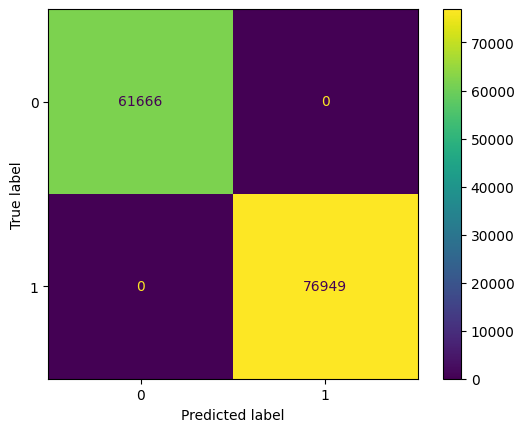

Accuracy = 100.00%
Precision = 100.00%
Sensibilidad = 100.00%
F1 Score = = 100.00%


In [62]:
evaluacionModelo(YtestRobusto, YpredRobustoEs)

Para el conjunto Robusto Normalizado

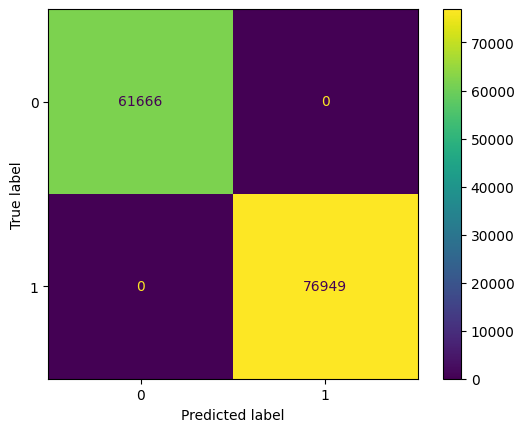

Accuracy = 100.00%
Precision = 100.00%
Sensibilidad = 100.00%
F1 Score = = 100.00%


In [63]:
evaluacionModelo(YtestRobusto, YpredRobustoNo)

Para el conjunto Ligero Estandarizado

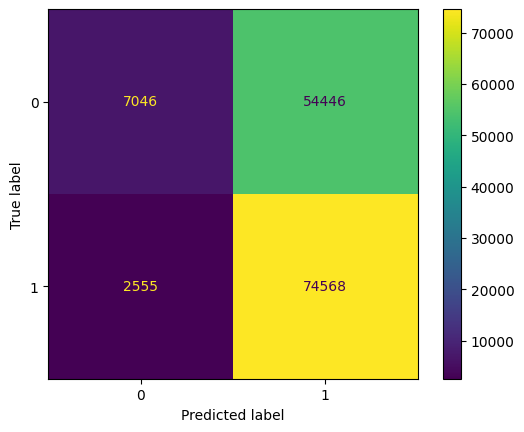

Accuracy = 58.88%
Precision = 57.80%
Sensibilidad = 96.69%
F1 Score = = 72.35%


In [64]:
evaluacionModelo(YtestLigero, YpredLigeroEs)

Para el conjunto ligero Normalizado

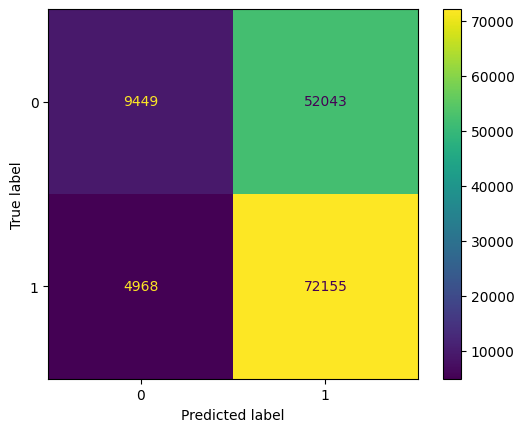

Accuracy = 58.87%
Precision = 58.10%
Sensibilidad = 93.56%
F1 Score = = 71.68%


In [65]:
evaluacionModelo(YtestLigero, YpredLigeroNo)

Comenzemos con el análisis porque tenemos resultados muy interesantes.

En primer lugar hay que mencionar el resultado más sorprendete: con los dataframes más robustos se alcanzó una clasificación perfecta: todas las métricas al 100%. Tanto con los datos estandarizados, como con los datos normalizados. 

En primer lugar, habría que conseguir más datos y verificar estas nuevas predicciones. Esto con el objetivo de ver si tenemos sobreajuste y por eso conseguimos las métricas perfectas.

Ahora bien, dado que no tenemos más datos para probar el modelo yo propongo lo siguiente: recordemos que este conjunto robusto no sólo tiene información adicional sobre las horas de ciertos parámetros meteorológicos. Este conjunto tienen 2 columnas: "name" y "product_id" que hacen referencia directa a la clase que vamos a predecir. Por lo tanto, sugiero hacer un conjunto nuevo sin estas etiquetas para verificar su comportamiento con el modelo. Si aun sin estas etiquetas el modelo sigue con métricas tan espectaculares, habremos encontrado un modelo ganador.

Por otro lado tenemos los resultados de los dataframes ligeros. Para empezar hay que decir que la diferencia entre los datos estandarizados y los normalizados no es tan significativa. Sin embargo, por muy poco se consiguieron mejores resultados con los estandarizados. Ahora, respecto al modelo su exactitud es muy mala: tan solo un 58.88%. 

Para analizar las otras métricas hay que hacer la aclaración que se consideraron la clase 0 (Lyft) como la clase falsa y la clase 1 (Uber) como la clase verdadera. Con esto podemos ver que lo que afectó al modelo es que detectó demasiados falsos positivos (asignó muchos Lift como si fuera Uber). Estos errores de tipo 1 hicieron que la precisión bajara muchísimo y por consiguiente la exactitud. Ahora bien, por estas características del modelo casi no tuvo falsos negativos (no hubo muchos Ubers que clasificara como Lyft). Por eso la sensibilidad subió tanto.

Si este modelo con los datos ligeros fuera hecho para medicina sería fenomenal porque no tendría casi falsos negativos. Sin embargo, al ser sobre empresas, Lyft no estaría feliz con que la f1 bajara hasta el 72% porque no detectas sus servicios correctamente (catalogándolos como los de la competencia). Por lo tanto, para este conjunto ligero estandarizado (porque dio mejores resultados que el normalizado) vamos a extender el número de iteraciones en el entrenamiento para ver si converge el modelo y obtenemos resultados más equilibrados.

De esta forma haremos dos modelos más:
1. Uno con un conjunto equilibrado estandarizado (el robusto sin las variables que hacen referencia a las clases).
2. Uno con el conjunto ligero estandarizado con más iteraciones que las que vienen por defecto en la regresión logística de scikit-learn

**Conjunto equilibrado estandarizado**

Repetimos el proceso que hicimos para este dataframe sin las columnas product_id y name

In [27]:
dfEquilibrado = dfRobusto.iloc[:,:]
dfEquilibrado.drop(["product_id", "name"], axis=1, inplace=True)

columnasEquilibradas = ['source', 'destination', 'short_summary', 'long_summary', 'icon']
matrizDispersaEquilibrado = ohe.fit_transform(dfEquilibrado[columnasEquilibradas])
dfEquilibradoCodificado = pd.DataFrame.sparse.from_spmatrix(matrizDispersaEquilibrado)
dfEquilibradoFinal = pd.concat([dfEquilibrado, dfEquilibradoCodificado], axis=1)
dfEquilibradoFinal = dfEquilibradoFinal.drop(columnasEquilibradas, axis=1)
dfEquilibradoFinal.columns = dfEquilibradoFinal.columns.astype("string")

YEquilibrado = dfRobustoFinal["cab_type"]
XEquilibrado = dfRobustoFinal.drop("cab_type", axis=1)

XtrainEquilibrado, XtestEquilibrado, YtrainEquilibrado, YtestEquilibrado = train_test_split(XEquilibrado, YEquilibrado, test_size=0.2)

dataXtraE, dataXteE = sc.fit_transform(XtrainEquilibrado.values), sc.fit_transform(XtestEquilibrado.values)
XtrainEquilibradoEs, XtestEquilibradoEs = pd.DataFrame(data=dataXtraE, columns=XtrainEquilibrado.columns), pd.DataFrame(data=dataXteE, columns=XtestEquilibrado.columns)

YpredEquilibradoEs = regresionLogistica(XtrainEquilibradoEs, XtestEquilibradoEs, YtrainEquilibrado)

Evaluamos este nuevo modelo

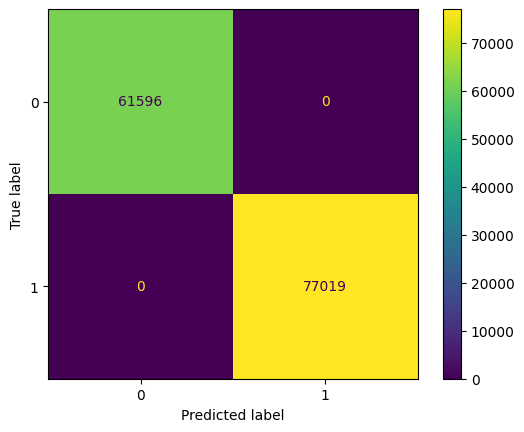

Accuracy = 100.00%
Precision = 100.00%
Sensibilidad = 100.00%
F1 Score = = 100.00%


In [28]:
evaluacionModelo(YtestEquilibrado, YpredEquilibradoEs)

¡Volvemos a obtener la clasificación perfecta! Aun sin las variables que hacían referencia directa a la clase.

**Conjunto ligero estandarizado con más iteraciones**

Dado que ya tenemos el conjunto ligero estandarizado preparado, lo único que tenemos que hacer es modificar ligeramente nuestra función para hacer la regresión logística. Esto con el objetivo de asignar nosotros el número máximo de iteraciones.

In [29]:
def regresionLogisticaIteraciones(Xtrain, Xtest, Ytrain, iteraciones):
    model = LogisticRegression(max_iter=iteraciones)
    model.fit(Xtrain, Ytrain)
    return model.predict(Xtest)

Intentemos con 400 iteraciones en lugar de las 100 que vienen por defecto. Sé que esto puede sobreajustar el modelo, pero quiero garantizar que sí se alcance la convergencia.

In [32]:
YpredLigeroEs = regresionLogisticaIteraciones(XtrainLigeroEs, XtestLigeroEs, YtrainLigero, 400)

Veamos los resultados. Todo parece que con las 400 iteraciones se alcanzó la convergencia porque no nos sacó ningún mensaje de advertencia.

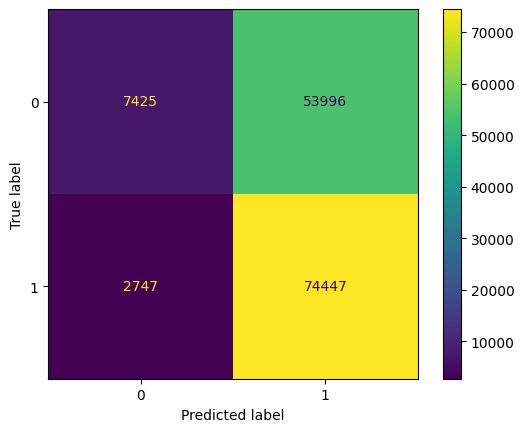

Accuracy = 59.06%
Precision = 57.96%
Sensibilidad = 96.44%
F1 Score = = 72.41%


In [33]:
evaluacionModelo(YtestLigero, YpredLigeroEs)

Aun con todas estas iteraciones no subimos las métricas ni un 1%.

# 4. Conclusiones

Con estos dos últimos modelos podemos llegar a las siguientes conclusiones de nuestros modelos con este conjunto de datos:
- En primer lugar, los datos del tiempo marcado en el clima aportan información increiblemente valiosa para nuestro modelo. Sobre todo en cuanto a clasificar correctamente la clase Lyft se refiere. Por lo tanto, eliminarlos fue una muy mala decisión porque eso hizo que las métricas se desplomaran irremediablemente.
- En esta ocasión no hubo gran diferencia entre normalizar y estandarizar los datos. Pienso que esto fue así porque la mayoría de las variables cuantitativas ya estaban con valores entre 0 y 1 (por ser probabilísticas).
- Quitar o no las variables que hacen referencia a nuestra clase directamente, no afectó el desempeño del algoritmo.
- Si bien es muy gratificante tener un modelo de clasificación perfecta, personalmente no cantaría victoria sin antes poder verificar con nuevos datos si se sobreajustó el modelo. Si aun con esos nuevos datos el modelo sostiene sus métricas tan altas, estamos ante un modelo que perfectamente se puede poner en producción.

Ahora bien, sobre el trabajo en general podemos hacer varios comentarios finales. El primero es que aunque hacer uso del OneHotEncoder pueda ser tardado, trae muy buenos beneficios al no establecer orden en una variable. Particularmente no le veo problema alguno salvo para los algoritmos que sufren con el aumento de la dimensionalidad en el dataframe.

También pudimos ver que probar el mismo algoritmo con diferentes variables del mismo dataframe nos permite comparar su desempeño. Esto es fundamental cuando queremos valorar cuál variable tiene más peso en la toma de decisiones que otras. Dado paso al área de machine learning de reducción de la dimensionalidad.

Entiendo que todo dependerá de los datos que estemos trabajando. Sin embargo, después del presente trabajo la regresión logística será de los primeros algoritmos candidatos a revisar cuando abordemos problemas de clasificación binaria.

Para futuros trabajos habría que conseguir más datos de este estilo para verificar si nuestro modelo perfecto tiene o no sobreajuste. Si se observa que no tiene sobreajuste el paso siguiente es ponerlo en producción. Por otra parte sería muy bueno revisar cómo funciona la regresión logística cuando se trata de clasificación multiclase.

# 5. Referencias

Adicionalmente al material brindado para la sesión de esta actividad se consultó la documentación de Scikit-Learn sobre el funcionamiento del OneHotEncoder y sobre la misma regresión logística.

- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression